# Data Science Methodology

#### 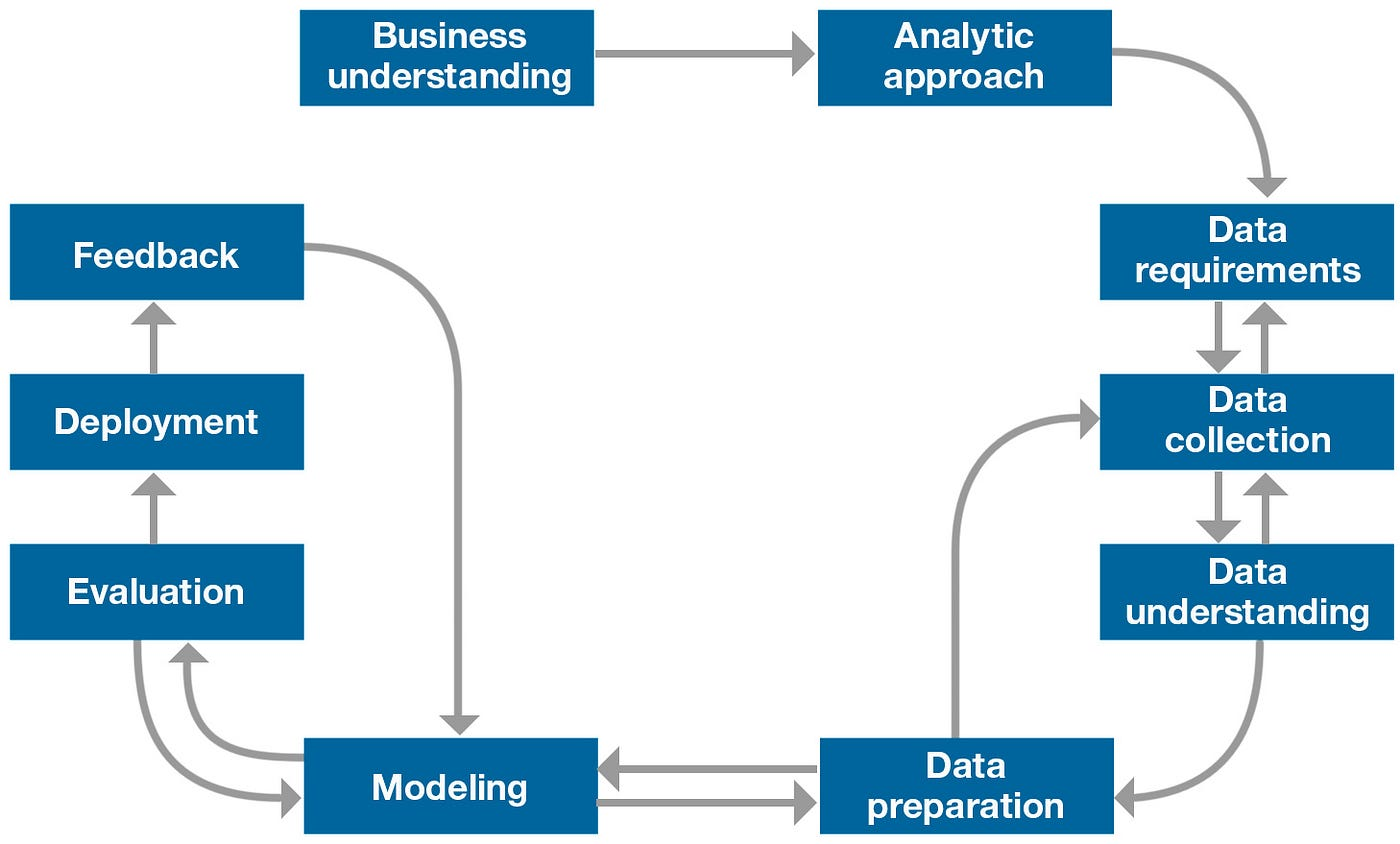

## Business Understanding

### Project Title:
 Predicting Carbon Emissions in the Oil and Gas Industry

### Problem Statement:
The oil and gas industry is under immense pressure to reduce its carbon footprint. Accurately predicting future carbon emissions is crucial for effective decarbonization strategies. This project aims to develop a model to forecast carbon emissions for major oil and gas companies, considering historical data, industry trends, and relevant external factors.

### Main Goal:
To build a predictive model capable of forecasting carbon emissions for oil and gas companies, enabling stakeholders to make informed decisions for decarbonization.

### Objective:
To develop a machine learning model that accurately predicts future carbon emissions based on historical data, company-specific factors, and industry trends.

### Potential Conclusions
Identification of key drivers of carbon emissions: Determine the most influential factors affecting emissions.
Comparison of predictive model performance: Evaluate the accuracy of different forecasting models.
Insights for decarbonization strategies: Provide recommendations based on predicted emission trends.
Early warning system: Identify companies with potential high emission growth.


## Analytical Approach

- regression

### algorithm
- linear regression
- random forest regressor
- ridge
- xg boost

## Data Understanding

### Data Source: https://www.kaggle.com/datasets/joebeachcapital/carbon-majors-emissions-data

In [1]:
import pandas as pd

df = pd.read_csv('/content/emissions_medium_granularity.csv')

df.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


In [3]:
df.describe()

,year,production_value,total_emissions_MtCO2e
count,12551.000000,12551.000000,12551.000000
mean,1987.148116,412.677443,113.205850
std,29.202455,1357.538128,329.789848
min,1854.000000,0.004398,0.000321
25%,1973.000000,10.601353,8.785294
50%,1994.000000,63.203536,33.058688
75%,2009.000000,320.664764,102.154596
max,2022.000000,27192.000000,8646.905949


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['production_value'] = scaler.fit_transform(df['production_value'].values.reshape(-1, 1))
df['total_emissions_MtCO2e'] = scaler.fit_transform(df['total_emissions_MtCO2e'].values.reshape(-1, 1))

df.describe()

,year,production_value,total_emissions_MtCO2e
count,12551.000000,1.255100e+04,1.255100e+04
mean,1987.148116,-2.717397e-17,-3.623196e-17
std,29.202455,1.000040e+00,1.000040e+00
min,1854.000000,-3.039984e-01,-3.432793e-01
25%,1973.000000,-2.961921e-01,-3.166402e-01
50%,1994.000000,-2.574424e-01,-2.430346e-01
75%,2009.000000,-6.778178e-02,-3.351132e-02
max,2022.000000,1.972717e+01,2.587721e+01


In [5]:
df['parent_entity'].value_counts()

parent_entity
Westmoreland Mining                   507
Former Soviet Union                   456
Poland                                416
China (Coal)                          312
Singareni Collieries                  304
                                     ... 
CNX Resources                          12
Adani Enterprises                      11
Cloud Peak                             11
Navajo Transitional Energy Company      8
Seriti Resources                        5
Name: count, Length: 122, dtype: int64

In [6]:
df['parent_entity'].unique()

array(['Abu Dhabi National Oil Company', 'Adani Enterprises',
       'Adaro Energy', 'Alliance Resource Partners',
       'Alpha Metallurgical Resources',
       'American Consolidated Natural Resources', 'Anglo American',
       'Antero', 'APA Corporation', 'Arch Resources', 'Banpu',
       'Bapco Energies', 'BASF', 'BHP', 'BP', 'British Coal Corporation',
       'Bumi Resources', 'Canadian Natural Resources', 'Cemex',
       'Cenovus Energy', 'Chesapeake Energy', 'Chevron', 'China (Cement)',
       'China (Coal)', 'Cloud Peak', 'CNOOC', 'CNPC', 'CNX Resources',
       'Coal India', 'ConocoPhillips', 'CONSOL Energy',
       'Continental Resources', 'Coterra Energy', 'CRH',
       'Cyprus AMAX Minerals', 'Czech Republic', 'Czechoslovakia',
       'Devon Energy', 'Ecopetrol', 'Egyptian General Petroleum', 'Eni',
       'EOG Resources', 'EQT Corporation', 'Equinor',
       'Exxaro Resources Ltd', 'ExxonMobil', 'Former Soviet Union',
       'Gazprom', 'Glencore', 'Heidelberg Materials', '

In [7]:
df_test = df[['parent_entity', 'commodity', 'production_value','total_emissions_MtCO2e']]

df_grouped = df_test.groupby(['parent_entity', 'commodity', 'production_value'], as_index = False).mean()

df_grouped

,parent_entity,commodity,production_value,total_emissions_MtCO2e
0,APA Corporation,Natural Gas,-0.275530,-0.334738
1,APA Corporation,Natural Gas,-0.273880,-0.334242
2,APA Corporation,Natural Gas,-0.264966,-0.331568
3,APA Corporation,Natural Gas,-0.256811,-0.329121
4,APA Corporation,Natural Gas,-0.241423,-0.324504
...,...,...,...,...
12258,YPF,Oil & NGL,-0.176560,-0.134082
12259,YPF,Oil & NGL,-0.175234,-0.131906
12260,YPF,Oil & NGL,-0.172214,-0.126948
12261,YPF,Oil & NGL,-0.169562,-0.122595


In [8]:
# concat df grouped and df.

import pandas as pd

df = df.drop(['parent_entity', 'commodity', 'production_value', 'total_emissions_MtCO2e'], axis=1)

df_new = pd.concat([df_grouped, df], axis=1)

df_new.head()

,parent_entity,commodity,production_value,total_emissions_MtCO2e,year,parent_type,production_unit
0,APA Corporation,Natural Gas,-0.275530,-0.334738,1962,State-owned Entity,Million bbl/yr
1,APA Corporation,Natural Gas,-0.273880,-0.334242,1962,State-owned Entity,Bcf/yr
2,APA Corporation,Natural Gas,-0.264966,-0.331568,1963,State-owned Entity,Million bbl/yr
3,APA Corporation,Natural Gas,-0.256811,-0.329121,1963,State-owned Entity,Bcf/yr
4,APA Corporation,Natural Gas,-0.241423,-0.324504,1964,State-owned Entity,Million bbl/yr


In [9]:
df_new.describe(include='all')

,parent_entity,commodity,production_value,total_emissions_MtCO2e,year,parent_type,production_unit
count,12263,12263,12263.000000,12263.000000,12551.000000,12551,12551
unique,122,9,NaN,NaN,NaN,3,4
top,Westmoreland Mining,Oil & NGL,NaN,NaN,NaN,Investor-owned Company,Million tonnes/yr
freq,502,3679,NaN,NaN,NaN,6583,5103
mean,NaN,NaN,0.003842,0.004057,1987.148116,NaN,NaN
std,NaN,NaN,1.010021,1.009646,29.202455,NaN,NaN
min,NaN,NaN,-0.303998,-0.343279,1854.000000,NaN,NaN
25%,NaN,NaN,-0.296091,-0.315951,1973.000000,NaN,NaN
50%,NaN,NaN,-0.256858,-0.241357,1994.000000,NaN,NaN
75%,NaN,NaN,-0.063771,-0.029895,2009.000000,NaN,NaN


In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   parent_entity           12263 non-null  object 
 1   commodity               12263 non-null  object 
 2   production_value        12263 non-null  float64
 3   total_emissions_MtCO2e  12263 non-null  float64
 4   year                    12551 non-null  int64  
 5   parent_type             12551 non-null  object 
 6   production_unit         12551 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


In [11]:
df_new.isna().sum()

parent_entity             288
commodity                 288
production_value          288
total_emissions_MtCO2e    288
year                        0
parent_type                 0
production_unit             0
dtype: int64

In [12]:
df_new.describe(include= 'all')

,parent_entity,commodity,production_value,total_emissions_MtCO2e,year,parent_type,production_unit
count,12263,12263,12263.000000,12263.000000,12551.000000,12551,12551
unique,122,9,NaN,NaN,NaN,3,4
top,Westmoreland Mining,Oil & NGL,NaN,NaN,NaN,Investor-owned Company,Million tonnes/yr
freq,502,3679,NaN,NaN,NaN,6583,5103
mean,NaN,NaN,0.003842,0.004057,1987.148116,NaN,NaN
std,NaN,NaN,1.010021,1.009646,29.202455,NaN,NaN
min,NaN,NaN,-0.303998,-0.343279,1854.000000,NaN,NaN
25%,NaN,NaN,-0.296091,-0.315951,1973.000000,NaN,NaN
50%,NaN,NaN,-0.256858,-0.241357,1994.000000,NaN,NaN
75%,NaN,NaN,-0.063771,-0.029895,2009.000000,NaN,NaN


In [13]:
# Fix missing values

# categorical features using mode
df_new['parent_entity'].fillna(df_new['parent_entity'].mode()[0], inplace=True)
df_new['commodity'].fillna(df_new['commodity'].mode()[0], inplace=True)

# numerical features using mean
df_new['production_value'].fillna(df_new['production_value'].mean(), inplace=True)
df_new['total_emissions_MtCO2e'].fillna(df_new['total_emissions_MtCO2e'].mean(), inplace=True)

df_new.isna().sum()


parent_entity             0
commodity                 0
production_value          0
total_emissions_MtCO2e    0
year                      0
parent_type               0
production_unit           0
dtype: int64

## Exploratory Data Analysis (EDA)

* finding correlations

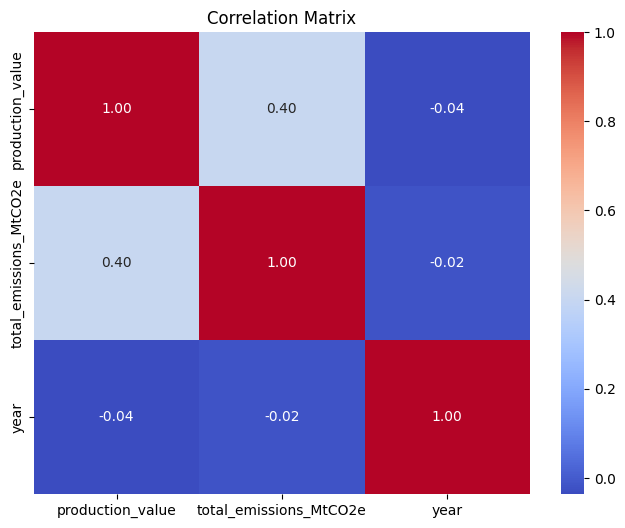

In [14]:
# correlation matrix visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
numerical_df = df_new.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

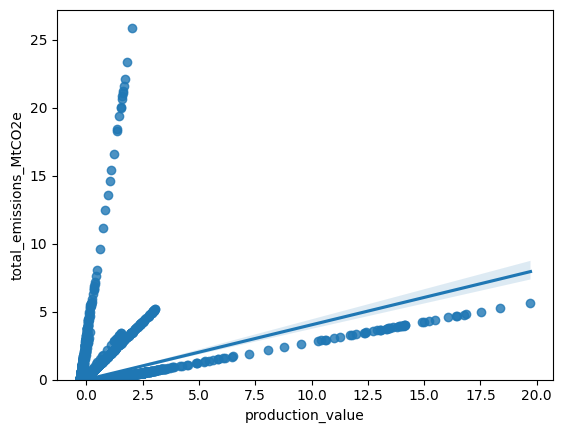

In [15]:
sns.regplot(x=df_new['production_value'], y=df_new['total_emissions_MtCO2e'])
plt.ylim(0,)
plt.show()

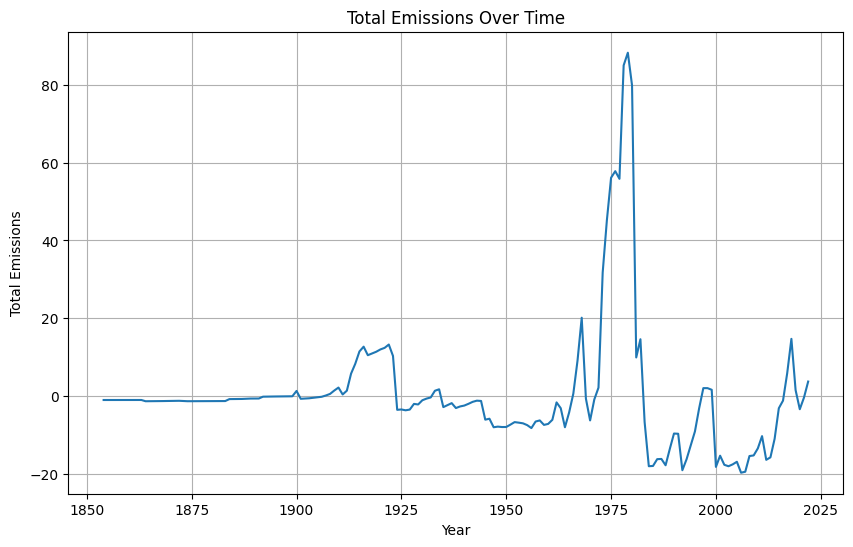

In [16]:
# Group data by year and sum emissions
total_emissions = df_new.groupby('year')['total_emissions_MtCO2e'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(total_emissions.index, total_emissions.values)
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Total Emissions Over Time')
plt.grid(True)
plt.show()

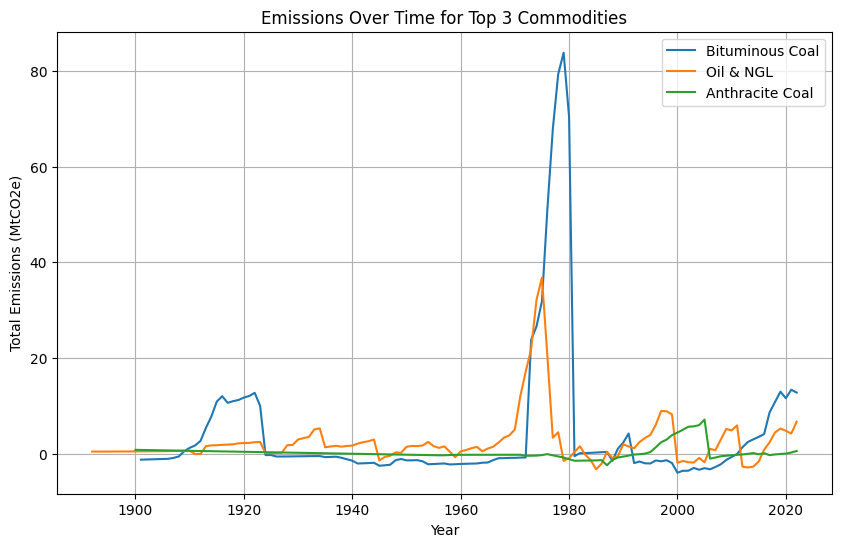

In [17]:
# Emissions over time for top 3 commodities

# Group data by commodity and year, then sum emissions
commodity_emissions = df_new.groupby(['commodity', 'year'])['total_emissions_MtCO2e'].sum().reset_index()

# Get top 3 commodities by total emissions
top_commodities = commodity_emissions.groupby('commodity')['total_emissions_MtCO2e'].sum().nlargest(3).index

# Filter data for top commodities
top_commodity_emissions = commodity_emissions[commodity_emissions['commodity'].isin(top_commodities)]

# Create the plot
plt.figure(figsize=(10, 6))
for commodity in top_commodities:
  subset = top_commodity_emissions[top_commodity_emissions['commodity'] == commodity]
  plt.plot(subset['year'], subset['total_emissions_MtCO2e'], label=commodity)

plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Emissions Over Time for Top 3 Commodities')
plt.legend()
plt.grid(True)
plt.show()


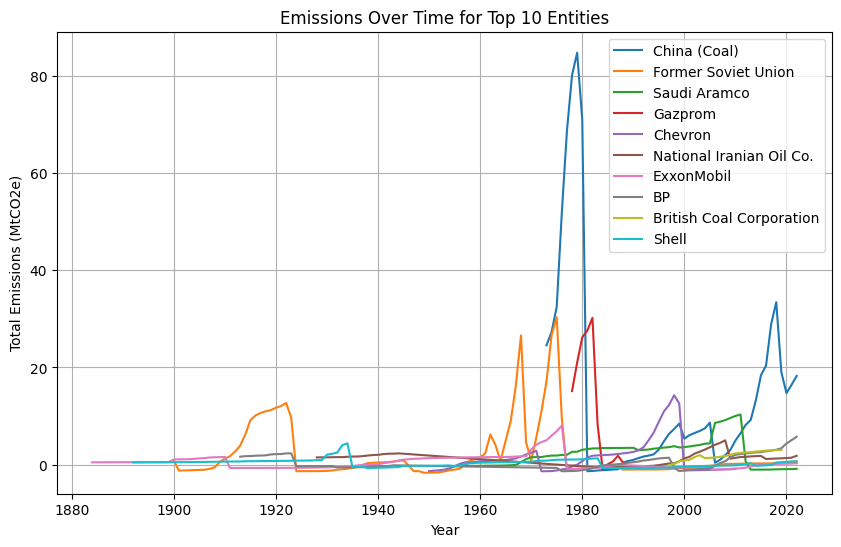

In [18]:
# emissions over time for top 10 entities

# Group data by parent_entity and year, then sum emissions
entity_emissions = df_new.groupby(['parent_entity', 'year'])['total_emissions_MtCO2e'].sum().reset_index()

# Get top 3 entities by total emissions
top_entities = entity_emissions.groupby('parent_entity')['total_emissions_MtCO2e'].sum().nlargest(10).index

# Filter data for top entities
top_entity_emissions = entity_emissions[entity_emissions['parent_entity'].isin(top_entities)]

# Create the plot
plt.figure(figsize=(10, 6))
for entity in top_entities:
  subset = top_entity_emissions[top_entity_emissions['parent_entity'] == entity]
  plt.plot(subset['year'], subset['total_emissions_MtCO2e'], label=entity)

plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Emissions Over Time for Top 10 Entities')
plt.legend()
plt.grid(True)
plt.show()


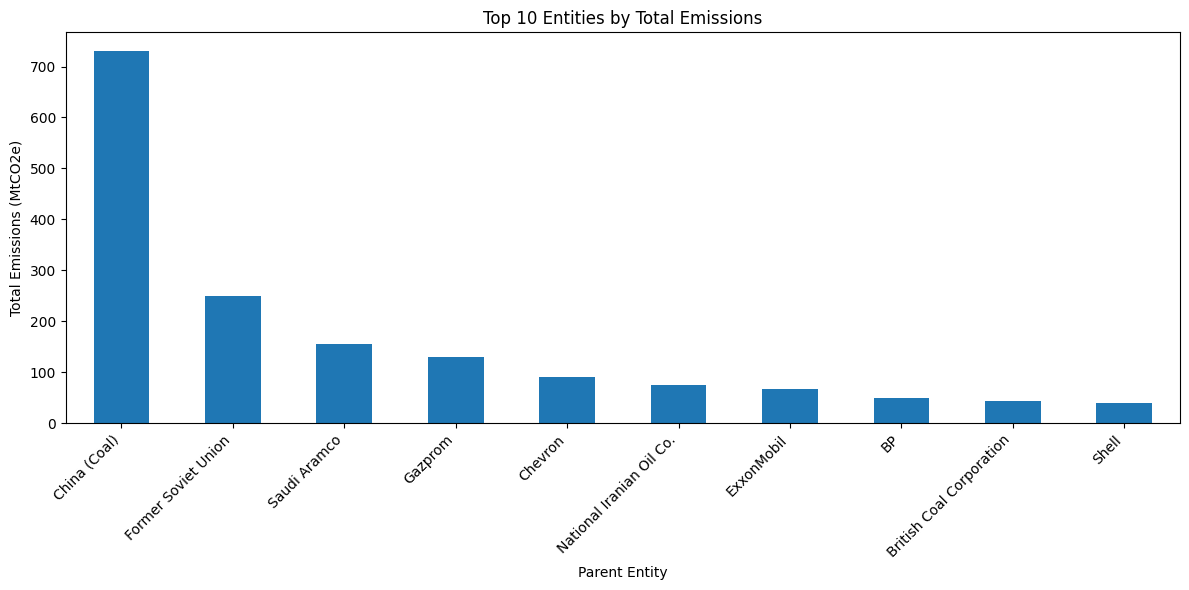

In [19]:
# top 10 total emissions by each parent entity over the years. plot graph

import matplotlib.pyplot as plt
# Group data by parent_entity and sum emissions
entity_total_emissions = df_new.groupby('parent_entity')['total_emissions_MtCO2e'].sum().sort_values(ascending=False)

# Get top 10 entities
top_10_entities = entity_total_emissions.head(10)

# Create the plot
plt.figure(figsize=(12, 6))
top_10_entities.plot(kind='bar')
plt.xlabel('Parent Entity')
plt.ylabel('Total Emissions (MtCO2e)')
plt.title('Top 10 Entities by Total Emissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


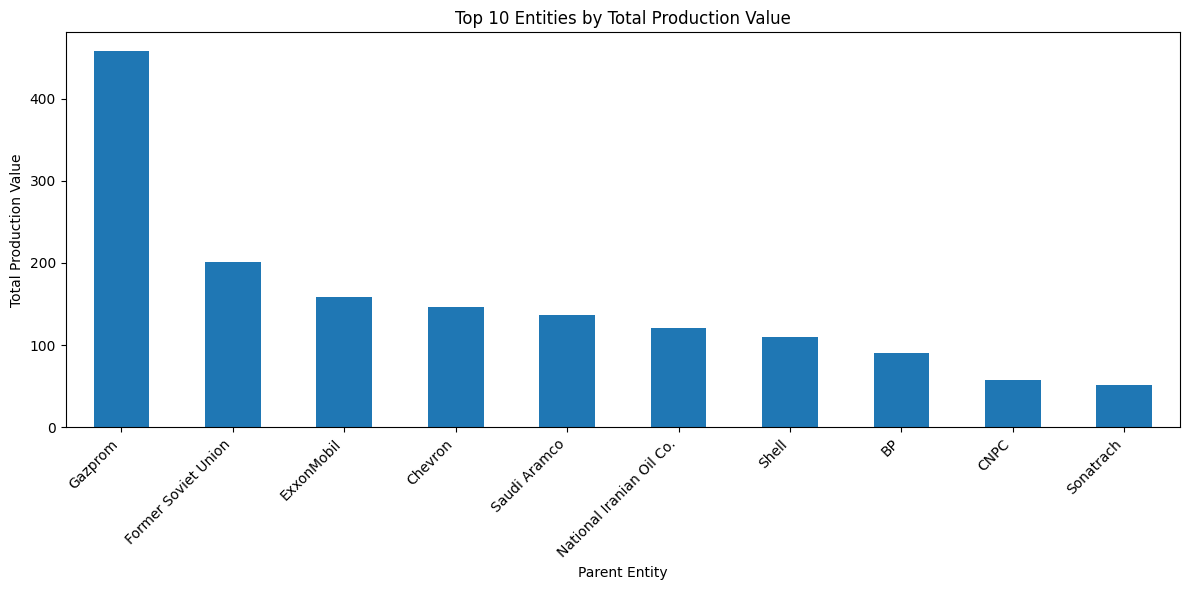

In [20]:
# top 10 total emissions from sum of production_value by parent_entity over the years

import matplotlib.pyplot as plt
# Group data by parent_entity and sum production values
entity_total_production = df_new.groupby('parent_entity')['production_value'].sum().sort_values(ascending=False)

# Get top 10 entities
top_10_entities_production = entity_total_production.head(10)

# Create the plot
plt.figure(figsize=(12, 6))
top_10_entities_production.plot(kind='bar')
plt.xlabel('Parent Entity')
plt.ylabel('Total Production Value')
plt.title('Top 10 Entities by Total Production Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Data Modelling

- finding the best R2 value to predict the best model using variation of algorithm - using polynomial regression

### Algorithm

- Model 1: Random Forest Regressor
- Model 2: Linear Regression
- Model 3: XG Boost Gradient
- Model 4: Ridge
- Model 5.1: SVM (kernel: rbf)
- Model 5.2: SVM (kernel: poly)


In [21]:
df_new.columns

Index(['parent_entity', 'commodity', 'production_value',
       'total_emissions_MtCO2e', 'year', 'parent_type', 'production_unit'],
      dtype='object')

In [22]:
# finding r2 using multi linear regression for production_value, year, parent_entity, commodity VS co2 emission

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle missing values

# Select features and target variable
features = ['production_value', 'year', 'parent_entity', 'commodity']
target = 'total_emissions_MtCO2e'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_new[features], df_new[target], test_size=0.2, random_state=42)

# Create a column transformer to handle categorical features and missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['parent_entity', 'commodity']),
        ('num', SimpleImputer(strategy='mean'), ['production_value', 'year']) # Impute missing numerical values with the mean
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessor and linear regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.3758661436775781


In [23]:
# finding r2 using multi linear regression for production_value, year, parent_entity VS co2 emission

# Select features and target variable
features = ['production_value', 'year', 'parent_entity']
target = 'total_emissions_MtCO2e'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_new[features], df_new[target], test_size=0.2, random_state=42)

# Create a column transformer to handle categorical features and missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['parent_entity']), # Handle categorical feature 'parent_entity'
        ('num', SimpleImputer(strategy='mean'), ['production_value', 'year']) # Impute missing values in numerical columns
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessor and linear regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.3115769056302754


In [24]:
#Finding the best fit model
# Polynomial degree 2 (production_value, year, parent_entity, commodity VS co2 emission)

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
import numpy as np

msk = np.random.rand(len(df)) <0.80
train = df_new[msk]
test = df_new[~msk]

#training the model

# Separate numerical and categorical features
numerical_features = ['production_value', 'year']
categorical_features = ['parent_entity', 'commodity']

# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

train_x = preprocessor.fit_transform(train[numerical_features + categorical_features])
train_y = np.asanyarray(train[['total_emissions_MtCO2e']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#prediction

test_x = preprocessor.transform(test[numerical_features + categorical_features]) # Use the same preprocessor fitted on training data
test_y = np.asanyarray(test[['total_emissions_MtCO2e']])

test_x_poly = poly.transform(test_x) # Only transform, do not fit again

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 Score is: ', (r2_score(test_y,test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  43.727743467664915
The MSE is:  0.47363359446557673


In [25]:
#Polynomial degree 3 (production_value, year, parent_entity, commodity VS co2 emission)

#training the model

# Separate numerical and categorical features
numerical_features = ['production_value', 'year']
categorical_features = ['parent_entity','commodity']

# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

train_x = preprocessor.fit_transform(train[numerical_features + categorical_features])
train_y = np.asanyarray(train[['total_emissions_MtCO2e']])

poly = PolynomialFeatures(degree=3)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#prediction

test_x = preprocessor.transform(test[numerical_features + categorical_features]) # Use the same preprocessor fitted on training data
test_y = np.asanyarray(test[['total_emissions_MtCO2e']])

test_x_poly = poly.transform(test_x) # Only transform, do not fit again

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 Score is: ', (r2_score(test_y,test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  43.638283128238776
The MSE is:  0.4743865662626144


In [26]:
# polynomial degree=3 (production_value, year, parent_entity VS co2 emission)

#training the model

# Separate numerical and categorical features
numerical_features = ['production_value', 'year']
categorical_features = ['parent_entity']

# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

train_x = preprocessor.fit_transform(train[numerical_features + categorical_features])
train_y = np.asanyarray(train[['total_emissions_MtCO2e']])

poly = PolynomialFeatures(degree=3)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#prediction

test_x = preprocessor.transform(test[numerical_features + categorical_features]) # Use the same preprocessor fitted on training data
test_y = np.asanyarray(test[['total_emissions_MtCO2e']])

test_x_poly = poly.transform(test_x) # Only transform, do not fit again

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 Score is: ', (r2_score(test_y,test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 Score is:  36.4366059251107
The MSE is:  0.5350018049271301


In [27]:
# polynomial degree=2 (production_value, year, parent_entity VS co2 emission)

import numpy as np
#training the model

# Separate numerical and categorical features
numerical_features = ['production_value', 'year']
categorical_features = ['parent_entity']

# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

train_x = preprocessor.fit_transform(train[numerical_features + categorical_features])
train_y = np.asanyarray(train[['total_emissions_MtCO2e']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#prediction

test_x = preprocessor.transform(test[numerical_features + categorical_features]) # Use the same preprocessor fitted on training data
test_y = np.asanyarray(test[['total_emissions_MtCO2e']])

test_x_poly = poly.transform(test_x) # Only transform, do not fit again

test_y_ = clf.predict(test_x_poly)

#Evaluation


print('The R2 Score is: ', (r2_score(test_y,test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))


The R2 Score is:  36.501236286708135
The MSE is:  0.5344578226459609


In [28]:
df.columns

Index(['year', 'parent_type', 'production_unit'], dtype='object')

In [29]:
df_new.columns

Index(['parent_entity', 'commodity', 'production_value',
       'total_emissions_MtCO2e', 'year', 'parent_type', 'production_unit'],
      dtype='object')

## Selection of features

* by using multi non-linear Polynomial degree = 2 for 4 features (production_value, year, parent_entity, commodity VS co2 emission) results with the highest R2 with 45.5 compared to other features

### Testing the Algorithms

### Model 1: Linear Regression

In [30]:
# prompt: calculate accuracy score for linear regression modelling for parent_entity', 'production_value', year vs  'total_emissions_MtCO2e'

import numpy as np
from sklearn.metrics import accuracy_score
#training the model

# Separate numerical and categorical features
numerical_features = ['production_value', 'year']
categorical_features = ['parent_entity', 'commodity']

# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

train_x = preprocessor.fit_transform(train[numerical_features + categorical_features])
train_y = np.asanyarray(train[['total_emissions_MtCO2e']])

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x, train_y)

#prediction

test_x = preprocessor.transform(test[numerical_features + categorical_features]) # Use the same preprocessor fitted on training data
test_y = np.asanyarray(test[['total_emissions_MtCO2e']])

test_y_ = clf.predict(test_x)

accuracy_score = clf.score(test_x, test_y) # Pass X_test as well

#Evaluation

from sklearn.metrics import r2_score
print('The R2 Score is: ', (r2_score(test_y,test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))
print(f'Accuracy Score: {accuracy_score}')


The R2 Score is:  39.07918935696242
The MSE is:  0.5127596492605291
Accuracy Score: 0.3907918935696242


In [31]:
# hyper tuning for linear regression

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create a LinearRegression model
model = linear_model.LinearRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit the grid search to the training data
grid_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
test_y_pred = best_model.predict(test_x)

# Evaluate the best model
print('R2 score:', r2_score(test_y, test_y_pred))
print('MSE:', mean_squared_error(test_y, test_y_pred))


Best hyperparameters: {'fit_intercept': False, 'positive': False}
R2 score: 0.3877919861109693
MSE: 0.5152846181177675


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 678, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/s

### Model 2: Random Forest Regressor

In [32]:
# calculate accuracy score for random forest regressor modelling for parent_entity', 'production_value', year vs  'total_emissions_MtCO2e'

import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Separate numerical and categorical features
numerical_features = ['production_value', 'year']
categorical_features = ['parent_entity', 'commodity']

# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

train_x = preprocessor.fit_transform(train[numerical_features + categorical_features])
train_y = np.asanyarray(train[['total_emissions_MtCO2e']])

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Fit the model to the training data
rf_regressor.fit(train_x, train_y.ravel())  # Flatten train_y if it's a column vector

# Prediction
test_x = preprocessor.transform(test[numerical_features + categorical_features])
test_y = np.asanyarray(test[['total_emissions_MtCO2e']])

test_y_ = rf_regressor.predict(test_x)

# Evaluation
print('The R2 Score is: ', (r2_score(test_y, test_y_)) * 100)
print('The MSE is: ', np.mean((test_y_ - test_y) ** 2))

# Calculate accuracy score (not typically used for regression)
# Instead, you might want to calculate R-squared or mean squared error
accuracy = rf_regressor.score(test_x, test_y)
print(f'Accuracy Score: {accuracy}')


The R2 Score is:  99.48822964255122
The MSE is:  1.6099706531611164
Accuracy Score: 0.9948822964255122


### Model 3: Ridge

In [33]:
import numpy as np
# Separate numerical and categorical features
numerical_features = ['production_value', 'year']
categorical_features = ['parent_entity', 'commodity']

# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

train_x = preprocessor.fit_transform(train[numerical_features + categorical_features])
train_y = np.asanyarray(train[['total_emissions_MtCO2e']])

# Create a Ridge Regression model
ridge_model = linear_model.Ridge()

# Fit the model to the training data
ridge_model.fit(train_x, train_y)

# Prediction
test_x = preprocessor.transform(test[numerical_features + categorical_features])
test_y = np.asanyarray(test[['total_emissions_MtCO2e']])

test_y_ = ridge_model.predict(test_x)

# Evaluation
print('The R2 Score is: ', (r2_score(test_y, test_y_)) * 100)
print('The MSE is: ', np.mean((test_y_ - test_y) ** 2))

# Calculate accuracy score (not typically used for regression)
# Instead, you might want to calculate R-squared or mean squared error
accuracy = ridge_model.score(test_x, test_y)
print(f'Accuracy Score: {accuracy}')


The R2 Score is:  39.088838706905115
The MSE is:  0.5126784323948967
Accuracy Score: 0.39088838706905116


In [34]:
# hyperparameter tuning for ridge modelling

# Define the hyperparameter grid to search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a Ridge Regression model
ridge_model = linear_model.Ridge()

# Create GridSearchCV object
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')

# Fit the grid search to the training data
grid_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
test_y_pred = best_model.predict(test_x)

# Evaluate the best model
print('R2 score:', r2_score(test_y, test_y_pred))
print('MSE:', mean_squared_error(test_y, test_y_pred))


Best hyperparameters: {'alpha': 100}
R2 score: 0.3725212290805928
MSE: 0.5281377432423155


### Model 4: XG Boost

In [35]:
# prompt: calculate accuracy score for xgboost modelling for parent_entity', 'production_value', year vs  'total_emissions_MtCO2e'

import numpy as np
!pip install xgboost

import xgboost as xgb

# Separate numerical and categorical features
numerical_features = ['production_value', 'year']
categorical_features = ['parent_entity', 'commodity']

# Apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

train_x = preprocessor.fit_transform(train[numerical_features + categorical_features])
train_y = np.asanyarray(train[['total_emissions_MtCO2e']])

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor()

# Fit the model to the training data
xgb_model.fit(train_x, train_y)

# Prediction
test_x = preprocessor.transform(test[numerical_features + categorical_features])
test_y = np.asanyarray(test[['total_emissions_MtCO2e']])

test_y_ = xgb_model.predict(test_x)

# Evaluation
print('The R2 Score is: ', (r2_score(test_y, test_y_)) * 100)
print('The MSE is: ', np.mean((test_y_ - test_y) ** 2))

# Calculate accuracy score (not typically used for regression)
# Instead, you might want to calculate R-squared or mean squared error
accuracy = xgb_model.score(test_x, test_y)
print(f'Accuracy Score: {accuracy}')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

## Cross Validation using Random Forest Regressor

In [36]:
# cross validation using random forest regressor

from sklearn.model_selection import cross_val_score

# Assuming preprocessor, train_x, and train_y are already defined as in the previous code

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Perform cross-validation
scores = cross_val_score(rf_regressor, train_x, train_y.ravel(), cv=5, scoring='r2')  # Flatten train_y if it's a column vector

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average R2 score:", scores.mean())


Cross-validation scores: [0.9282948  0.30596686 0.98000718 0.99592623 0.93247109]
Average R2 score: 0.8285332321053124


## Model Deployment using Gradio

### The best model selected is Random Forest Regressor with 99.7% accuracy

In [37]:
df_new['production_value'].describe()

count    12551.000000
mean         0.003842
std          0.998365
min         -0.303998
25%         -0.295751
50%         -0.253189
75%         -0.031288
max         19.727173
Name: production_value, dtype: float64

In [38]:
# prompt: deploy random forest regressor model using gradio

import pandas as pd
!pip install gradio

import gradio as gr

# Assuming preprocessor, train_x, and train_y are already defined as in the previous code

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Fit the model to the training data
rf_regressor.fit(train_x, train_y.ravel())

# Define the prediction function
def predict_emissions(production_value, year, parent_entity, commodity):
  # Create input DataFrame
  input_data = pd.DataFrame({
      'production_value': [production_value],
      'year': [year],
      'parent_entity': [parent_entity],
      'commodity': [commodity]
  })

  # Transform input data using the preprocessor
  input_transformed = preprocessor.transform(input_data)

  # Make prediction
  prediction = rf_regressor.predict(input_transformed)[0]

  return prediction

# Create Gradio interface
inputs = [
     gr.Slider(-0.303998, 19.727173, value=4, label="Production Value", info="Choose between -0.303998 and 19.727173"),
    gr.Dropdown(df_new['year'].unique().tolist(), label="year"),
    gr.Dropdown(df_new['parent_entity'].unique().tolist(), label="Company"),
    gr.Dropdown(df_new['commodity'].unique().tolist(), label="Commodity")
]
output = gr.Number(label="Predicted CO2 Emissions (MtCO2e)")

gr_interface = gr.Interface(fn=predict_emissions, inputs=inputs, outputs=output)

# Launch the interface
gr_interface.launch()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in